In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import re
import itertools

In [2]:
# pd.options.display.max_rows = 15000
# pd.options.display.max_colwidth = 100

In [3]:
files = ["881_genomecov.tsv", "882_genomecov.tsv", "887_genomecov.tsv",
         "888_genomecov.tsv", "889_genomecov.tsv", "890_genomecov.tsv"]
df_dict = {}
samples = []
for f in files:
    fname = re.search("(.+?)_genomecov.tsv", f).group(1)
    samples.append(fname)
    
    df1 = pd.read_csv(f, sep="\t", names=["reference", "position", "coverage"])
    df = df1.drop(columns='reference')
    df_dict[f] = df

In [4]:
samples

['881', '882', '887', '888', '889', '890']

In [5]:
df_dict["881_genomecov.tsv"]

,position,coverage
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
6,7,0.0
7,8,0.0
8,9,0.0
9,10,0.0


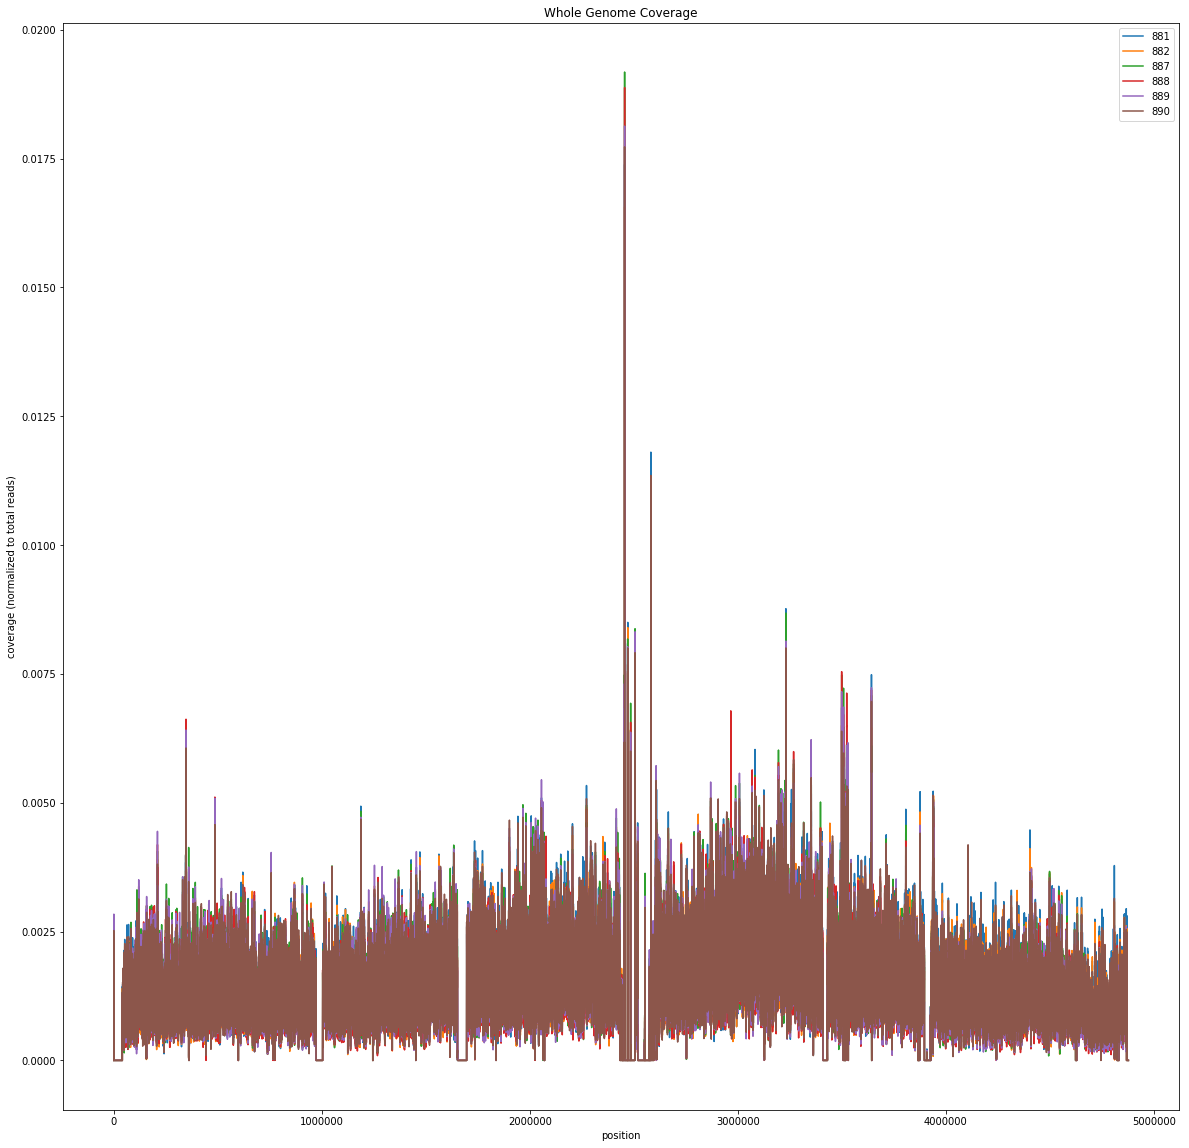

In [6]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.set_title("Whole Genome Coverage")
ax.set_xlabel("position")
ax.set_ylabel("coverage (normalized to total reads)")
for file in files:
    fname = file[0:3]
    df = df_dict[file]
    pos, cov = df["position"], df["coverage"]
    ax.plot(pos, cov, label=fname)
#     df.plot.bar()
ax.legend()

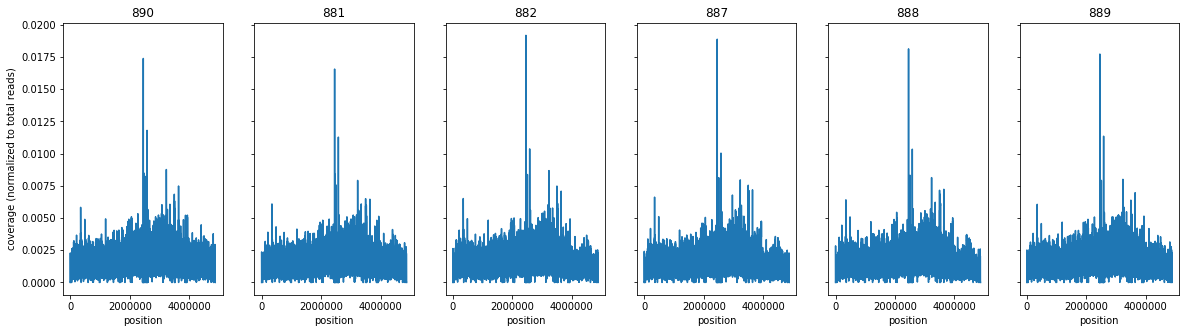

In [7]:
fig2, ax2 = plt.subplots(1, len(files), sharey=True, figsize=(20,5))
ax2[0].set_ylabel('coverage (normalized to total reads)')
for j, file in zip(range(len(files)), files):
    ax2[j].set_title(samples[j-1])
    ax2[j].set_xlabel('position')
    df = df_dict[file]
    pos = df['position']
    cov = df['coverage']
    ax2[j].plot(pos, cov)

In [8]:
# # fig, ax = plt.subplots(1)
# # ax.set_title("Whole Genome Coverage")
# # ax.set_xlabel("position")
# # ax.set_ylabel("coverage (normalized to total reads)")
# for file in files:
#     fname = re.search("(.+?)_genomecov.tsv", file).group(1)
#     df = df_dict[file]
# #     pos, cov = df['position'], df['coverage']
# #     df_by100 = df.groupby(df.index//100000).mean()
# #     pos, cov = df_by100["position"], df_by100["coverage"]
#     df.plot.hist(bins=5000)
# # ax.legend()

In [19]:
pair_df = {}
for pair in itertools.combinations(files, 2):
    f1 = pair[0]
    f2 = pair[1]
    df1 = df_dict[f1]
    df2 = df_dict[f2]
#     df1_named = df1.rename(index=str, columns={'coverage': f1})
    df1['coverage2'] = df2['coverage']
    df1['difference'] = df1['coverage'] - df2['coverage']
    pair_df[f1 + ' + ' + f2] = df1

In [20]:
pd.options.display.max_rows = 300
pair_df['881_genomecov.tsv' + ' + 882_genomecov.tsv']

,position,coverage,coverage2,difference
0,1,0.000000,0.000000,0.000000
1,2,0.000000,0.000000,0.000000
2,3,0.000000,0.000000,0.000000
3,4,0.000000,0.000000,0.000000
4,5,0.000000,0.000000,0.000000
5,6,0.000000,0.000000,0.000000
6,7,0.000000,0.000000,0.000000
7,8,0.000000,0.000000,0.000000
8,9,0.000000,0.000000,0.000000
9,10,0.000000,0.000000,0.000000


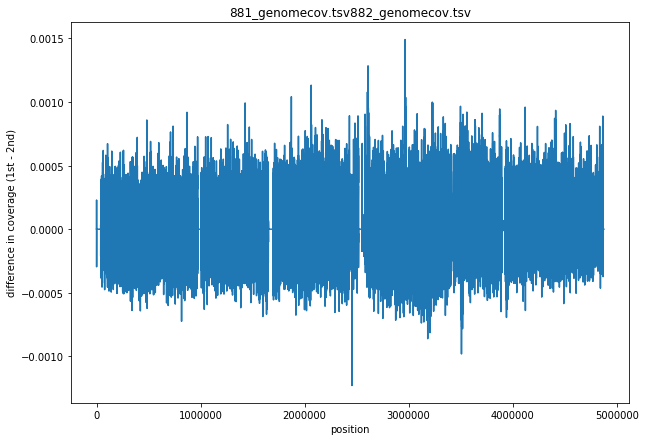

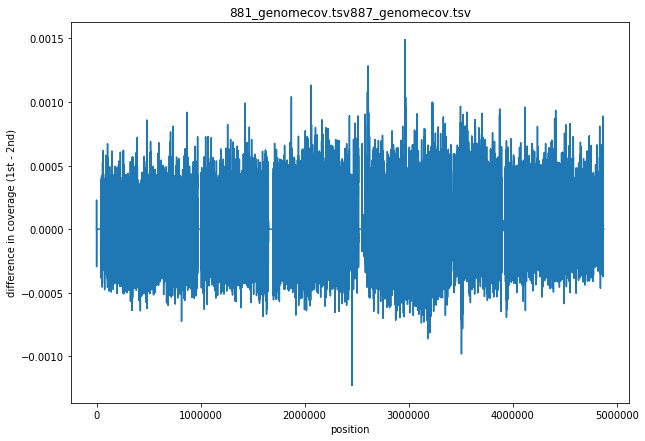

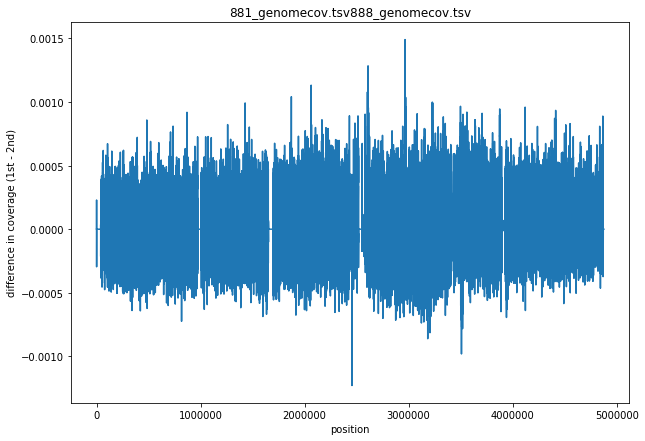

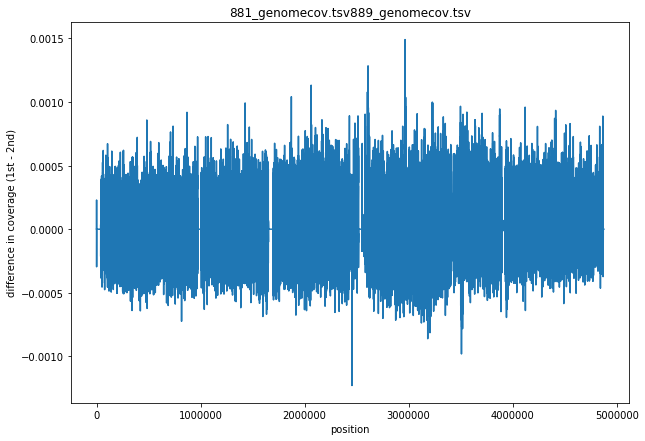

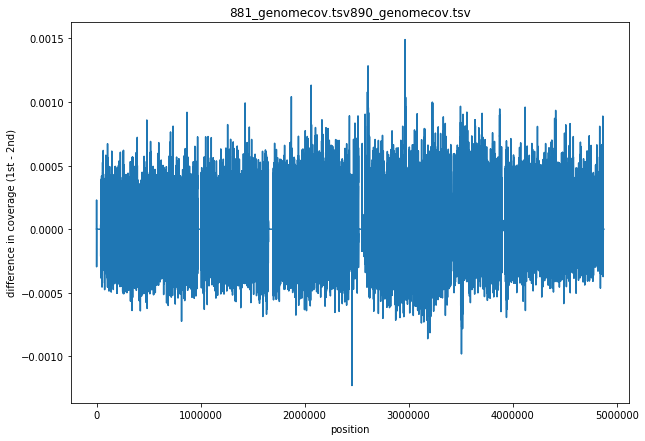

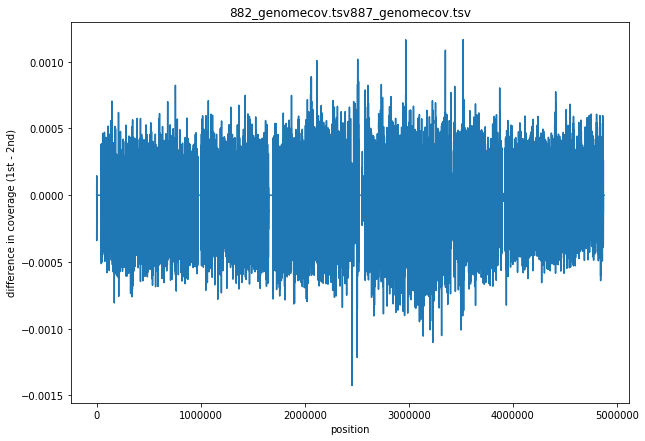

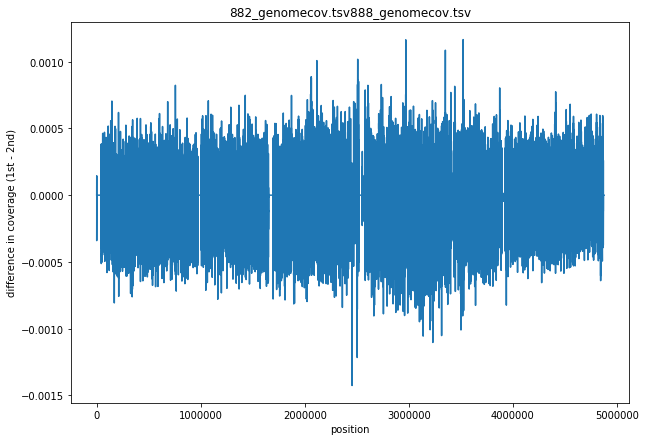

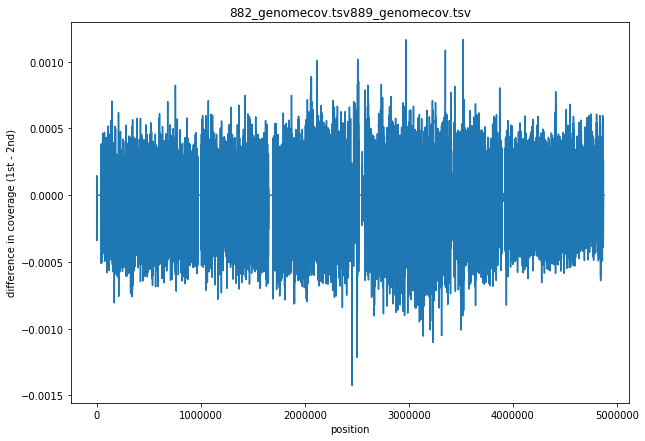

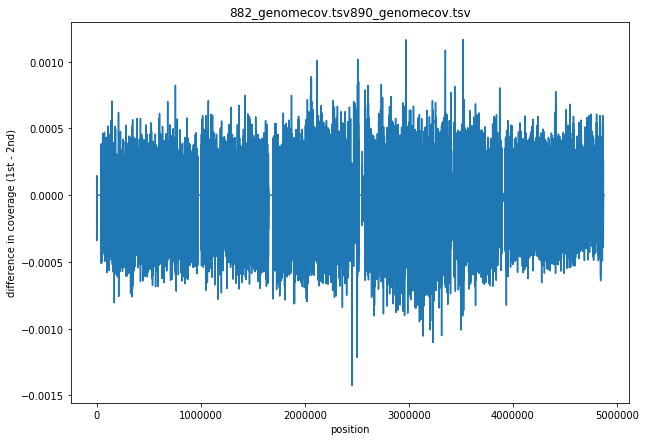

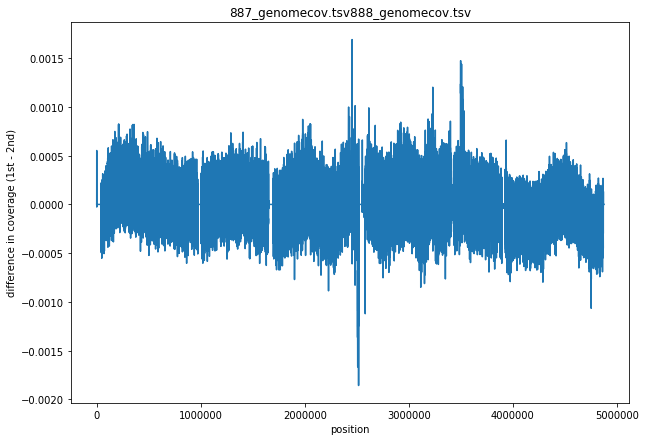

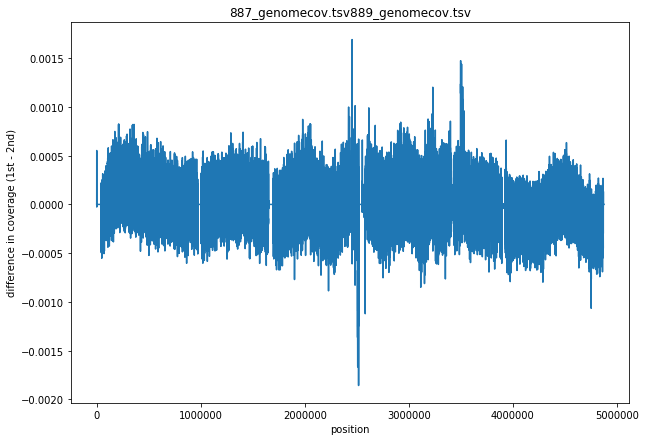

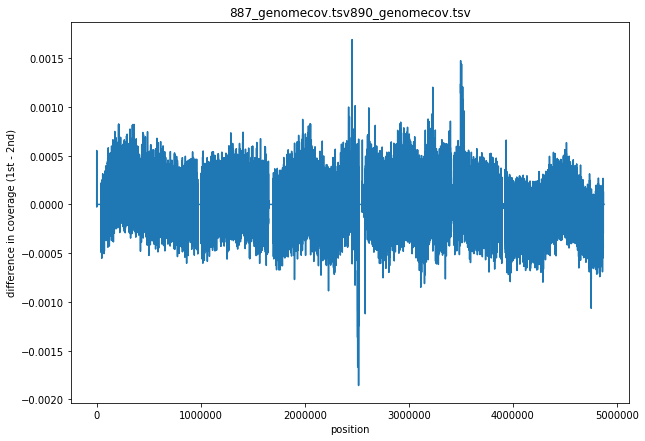

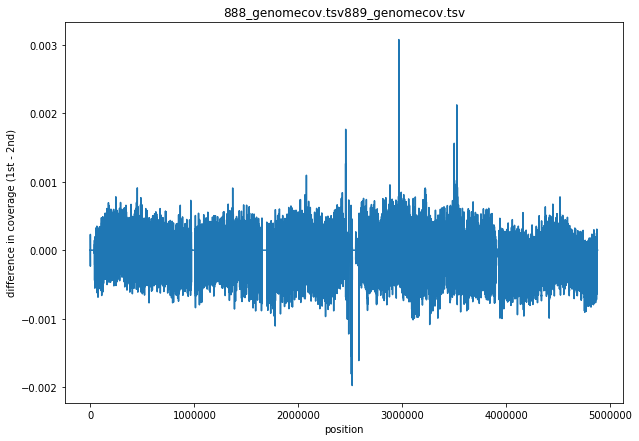

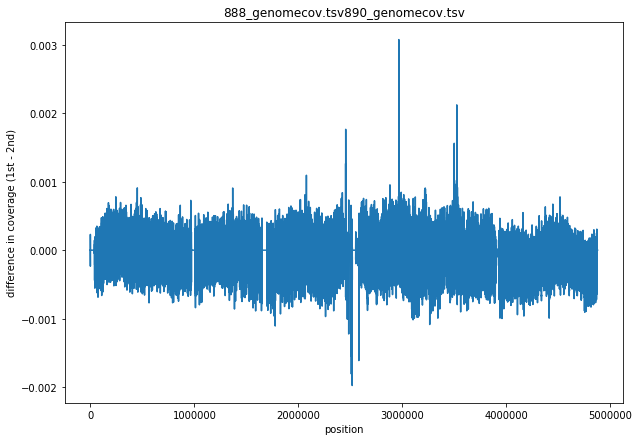

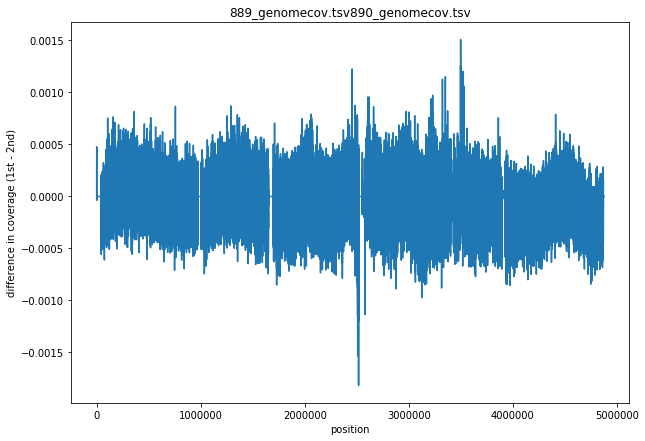

In [11]:
for p in pair_df:
    fig, ax = plt.subplots(1, figsize=(10,7))
    ax.set_title(p)
    ax.set_xlabel('position')
    ax.set_ylabel('difference in coverage (1st - 2nd)')
    
    df = pair_df[p]
    pos, cov = df['position'], df['difference']
    
    ax.plot(pos, cov)

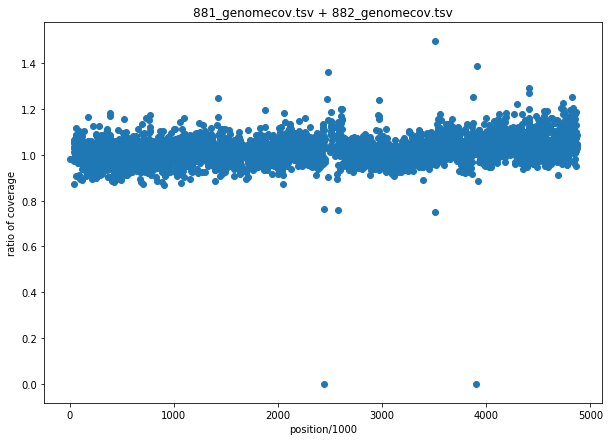

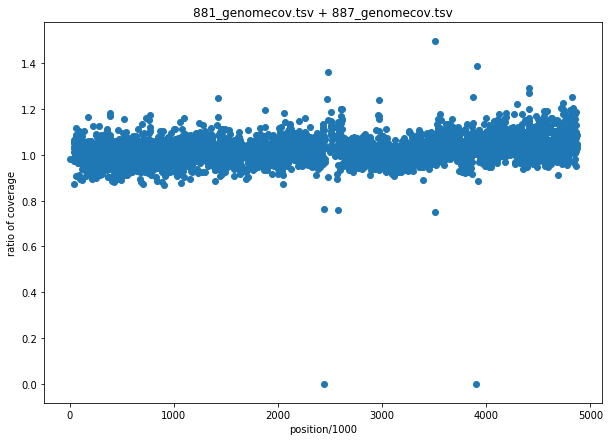

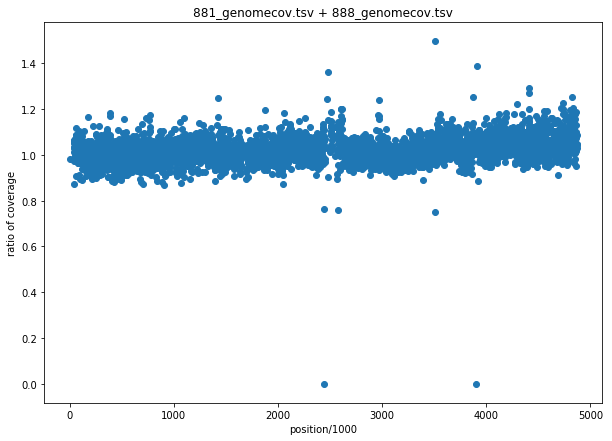

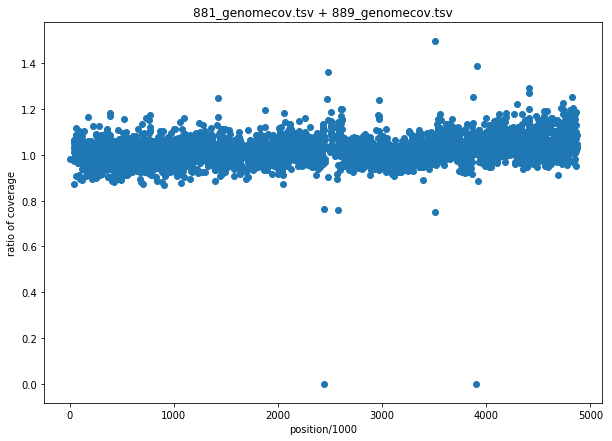

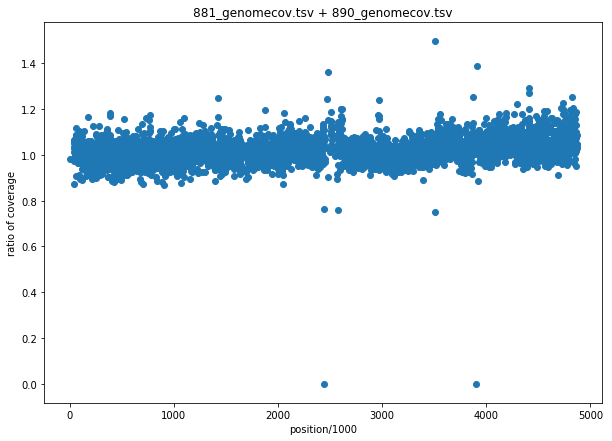

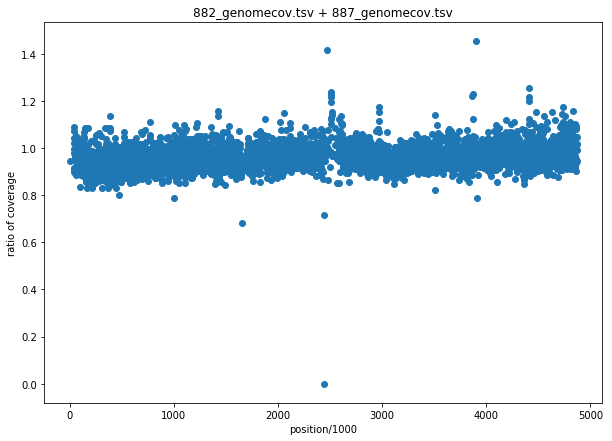

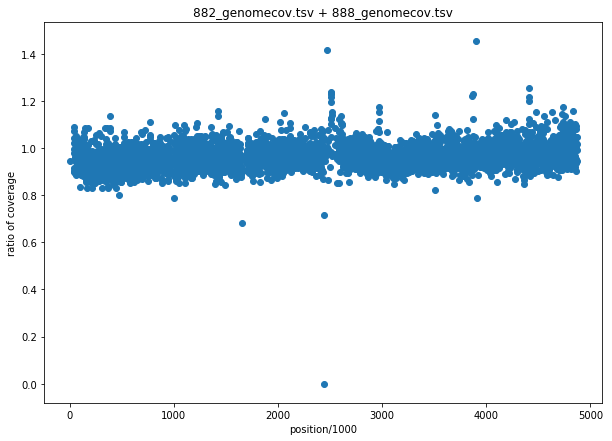

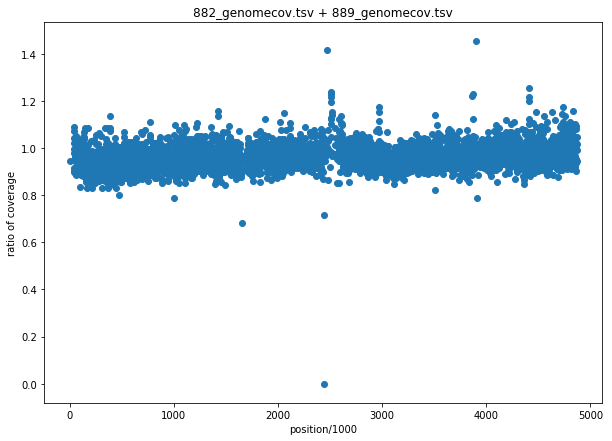

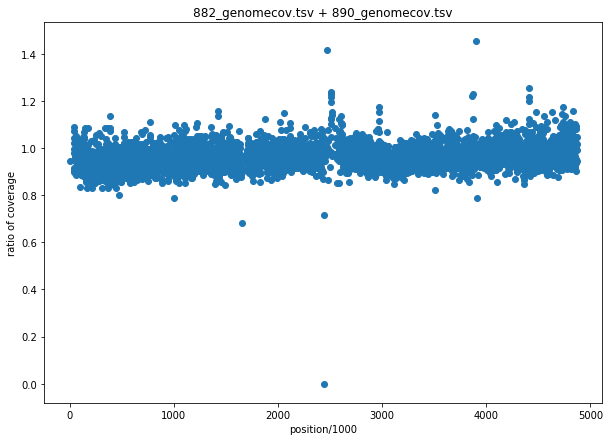

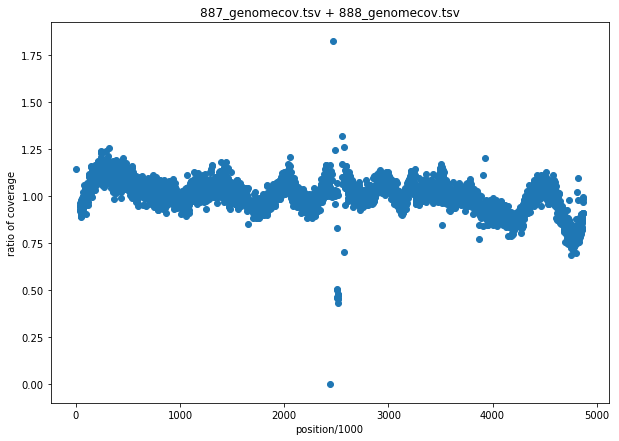

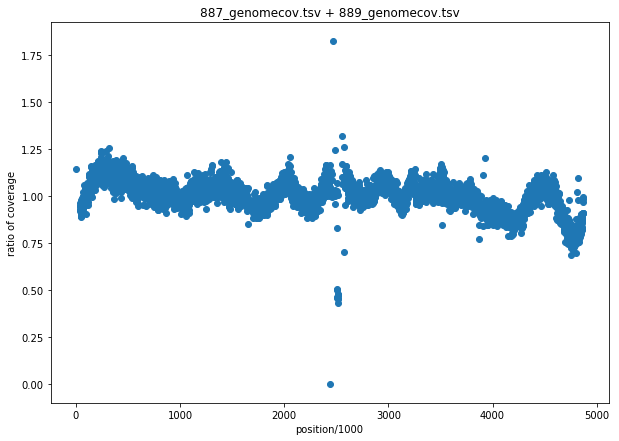

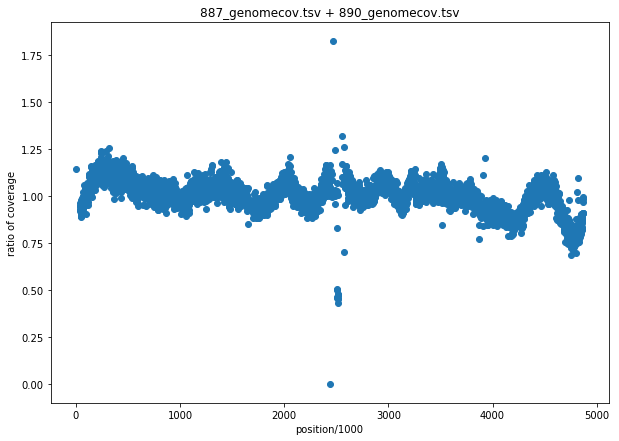

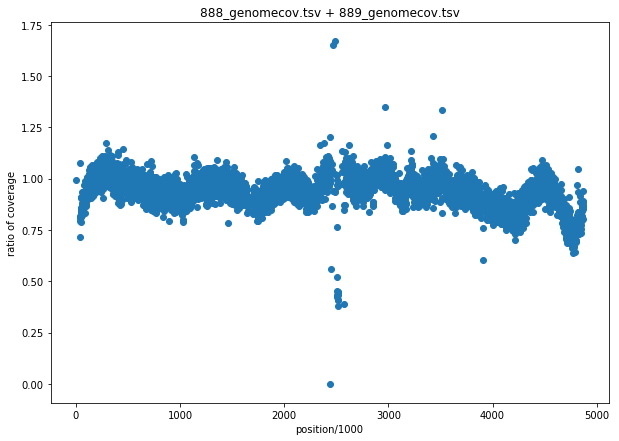

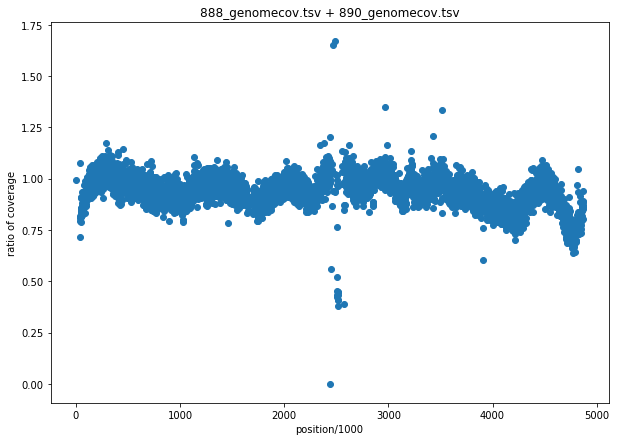

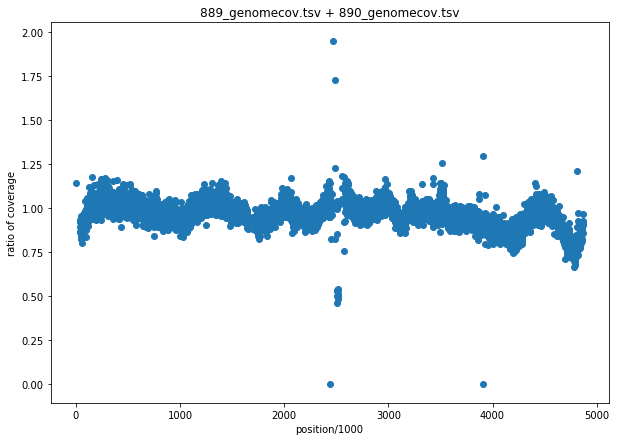

In [22]:
for p in pair_df:
    interval = 1000
    fig, ax = plt.subplots(1, figsize=(10,7))
    ax.set_title(p)
    ax.set_xlabel('position/' + str(interval))
    ax.set_ylabel('ratio of coverage')
    df = pair_df[p]
    mean_cov = df.groupby(df.index//interval).mean()
    mean_cov['cov1/cov2'] = mean_cov['coverage']/mean_cov['coverage2']
    pos, cov = mean_cov.index, mean_cov['cov1/cov2']
#     ax.plot(pos, cov)
    ax.scatter(pos, cov)

In [13]:
test = files[0]
testdf = df_dict[test]
data = testdf['difference']

In [14]:
# data_bin = pd.cut(data, 5000)

In [35]:
# len(data_bin)

4876999

In [50]:
test_mean = testdf.groupby(testdf.index//50000).mean()
test_mean['cov1/cov2'] = test_mean['coverage']//test_mean['coverage2']
test_mean

,position,coverage,coverage2,difference,cov1/cov2
0,25000.5,0.000203,0.000199,4.342474e-06,1.0
1,75000.5,0.001080,0.001055,2.486110e-05,1.0
2,125000.5,0.001217,0.001212,4.804869e-06,1.0
3,175000.5,0.001186,0.001199,-1.349788e-05,0.0
4,225000.5,0.001115,0.001131,-1.601855e-05,0.0
5,275000.5,0.001213,0.001212,1.232983e-06,1.0
6,325000.5,0.001318,0.001305,1.292787e-05,1.0
7,375000.5,0.001235,0.001234,1.024979e-06,1.0
8,425000.5,0.001182,0.001214,-3.154283e-05,0.0
9,475000.5,0.001289,0.001304,-1.520224e-05,0.0


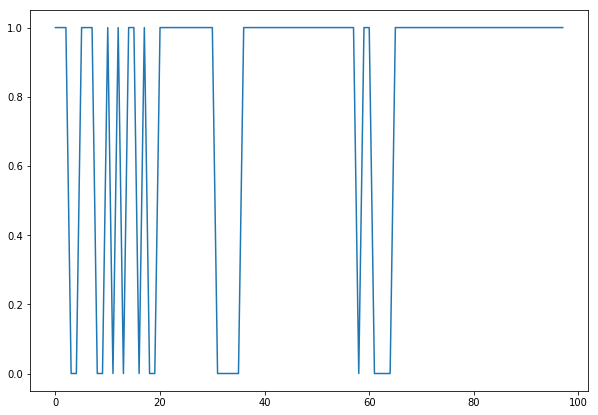

In [49]:
testfig, testax = plt.subplots(1, figsize=(10,7))
testp, testc = test_mean.index, test_mean['cov1/cov2']
testax.plot(testp, testc)